In [48]:
import rasterio
from scipy import ndimage
import matplotlib.pyplot as plt
import pyproj

In [57]:
with rasterio.open('out_raster/reclass/vari_reclass_sec.tif') as dataset:
    data = dataset.read(1)

In [60]:
sdata = ndimage.gaussian_filter(data, sigma=1)
sdata = ndimage.median_filter(data, size=2)
#sdata = rasterio.features.opening(data, disk(2))

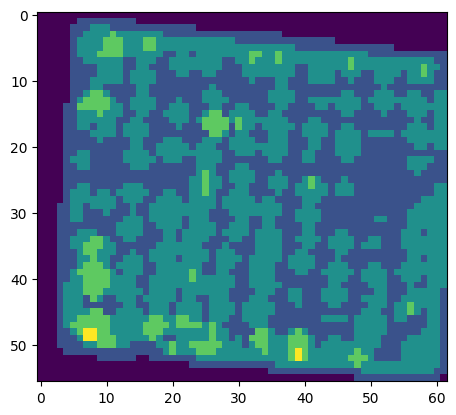

In [61]:
plt.imshow(sdata)

In [56]:
#VARI EXPORT
new_tiff_profile_vari = dataset.profile  # Copy the profile from the original dataset
new_tiff_profile_vari.update(
                        dtype=rasterio.float32,  # Update the data type to match the VARI data
                        count=1,  # Only one band for VARI
                        compress='lzw',  # You can choose a compression method if needed
                        tiled=False,
                        blockysize=1,
                        nodata=0.0
)
new_crs = pyproj.CRS.from_epsg(32651)
new_tiff_profile_vari.update(crs=new_crs)

#export data to file
with rasterio.open('out_raster/jagged/jagged_test.tif', 'w', **new_tiff_profile_vari) as new_tiff:
                            new_tiff.write(sdata, 1)